# Google maps
Realizaremos un analisis cualitativo y cuantitatibo de los datos para ver su distribucion y quizá datos anormales que puedan servir o afectar dentro de nuestro enfoque

In [2]:
# Importamos las librerias a usar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Leemos los archivos necesarios
estado = pd.read_parquet('../Data/Parquet/Reviews_florida.parquet')
Sitios = pd.read_parquet('../Data/Parquet/Sitios.parquet')

Para empezar observaremos la distribusion de los datos y haremos un analisis de ellos 

In [28]:
print(estado.info())
print(estado.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67325 entries, 0 to 67324
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        67325 non-null  float64       
 1   user_name      67325 non-null  object        
 2   rating         67325 non-null  int64         
 3   text           39360 non-null  object        
 4   resp           67325 non-null  object        
 5   gmap_id        67325 non-null  object        
 6   business_name  67325 non-null  object        
 7   category       67325 non-null  object        
 8   city           67325 non-null  object        
 9   State_review   67325 non-null  object        
 10  date           67325 non-null  datetime64[ns]
 11  hour           67325 non-null  int32         
 12  day            67325 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(9)
memory usage: 6.4+ MB
None
            user_id        rat

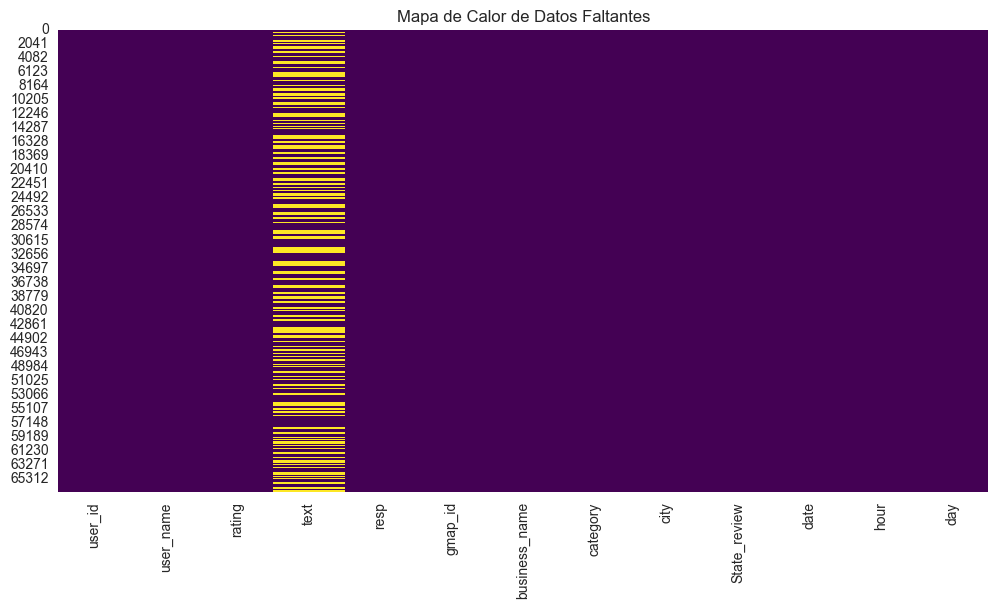

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(estado.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Datos Faltantes')
plt.show()

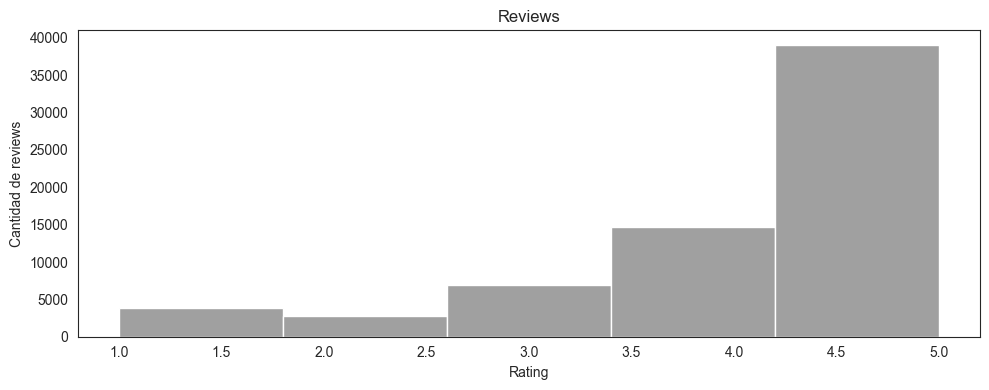

In [7]:
# Guardamos en una variable unicamente los datos numericos del dataframe
datos_numericos= estado.select_dtypes(include=[np.number])
# Graficamos un histograma para ver graficamente la distribucion de los reviews dados
plt.figure(figsize=(10,4))
sns.set_style("white")
sns.histplot(data= datos_numericos, x= 'rating', bins=5, color='grey')
plt.title('Reviews')
plt.ylabel('Cantidad de reviews')
plt.xlabel('Rating')
plt.tight_layout()

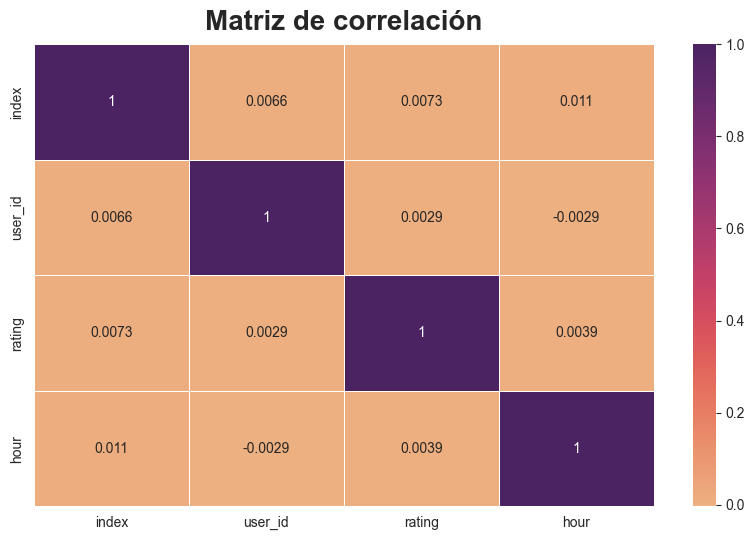

In [10]:
# Graficamos la matriz de correlacion 
plt.figure(figsize=(10, 6))
sns.heatmap(datos_numericos.corr(), annot=True, cmap='flare', linewidths=.5)
plt.title('Matriz de correlación', fontweight='bold', fontsize=20, ha='center', va='bottom')
plt.show()

In [18]:
city_counts = estado['city'].value_counts()

# Paso 2: Seleccionar las primeras N ciudades con más valores (por ejemplo, las primeras 10)
top_cities = city_counts.sort_values(ascending=False).head(10)
top_cities

city
Orlando               5965
Jacksonville          4318
St. Petersburg        2734
Tampa                 2652
Pensacola             2587
Plantation            2324
Gainesville           1951
Miami                 1920
Authentic Mexican"    1900
Aventura              1854
Name: count, dtype: int64

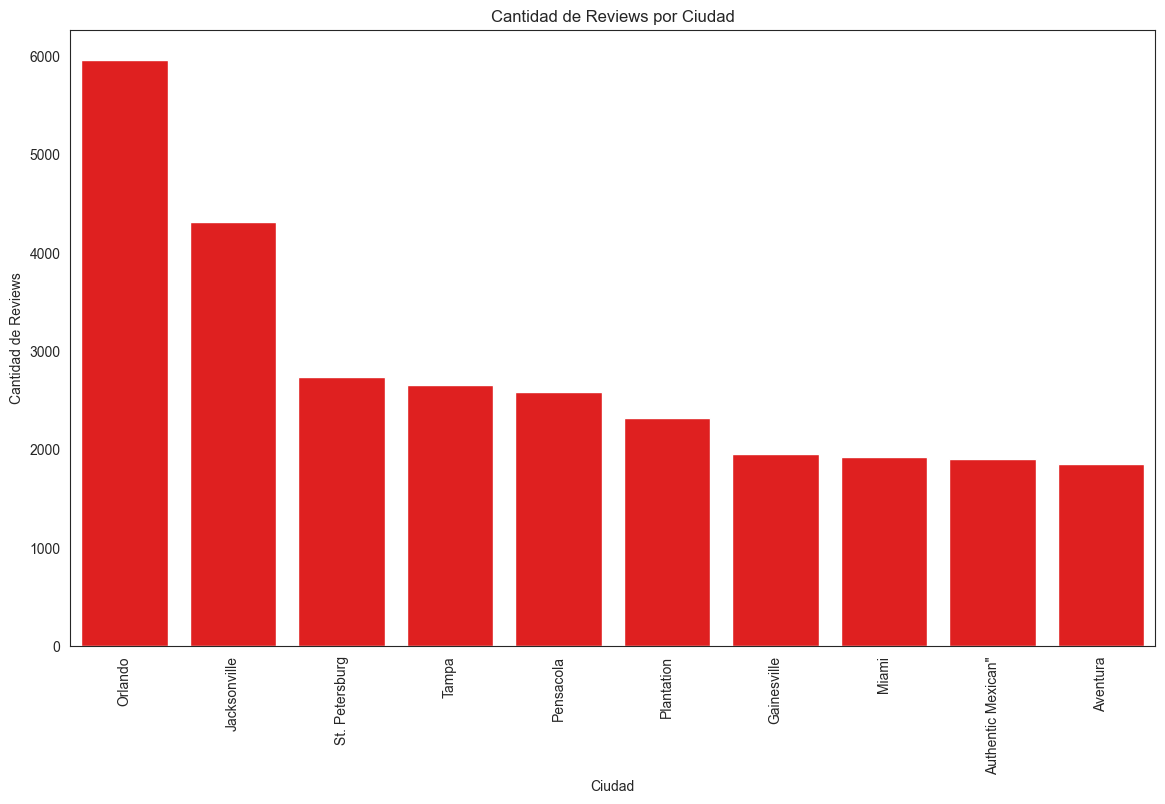

In [37]:
plt.figure(figsize=(14,8))
sns.countplot(data=estado, x='city', order=estado['city'].value_counts().head(10).index, color='r')
plt.title('Cantidad de Reviews por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Reviews')
plt.xticks(rotation=90)
plt.show()

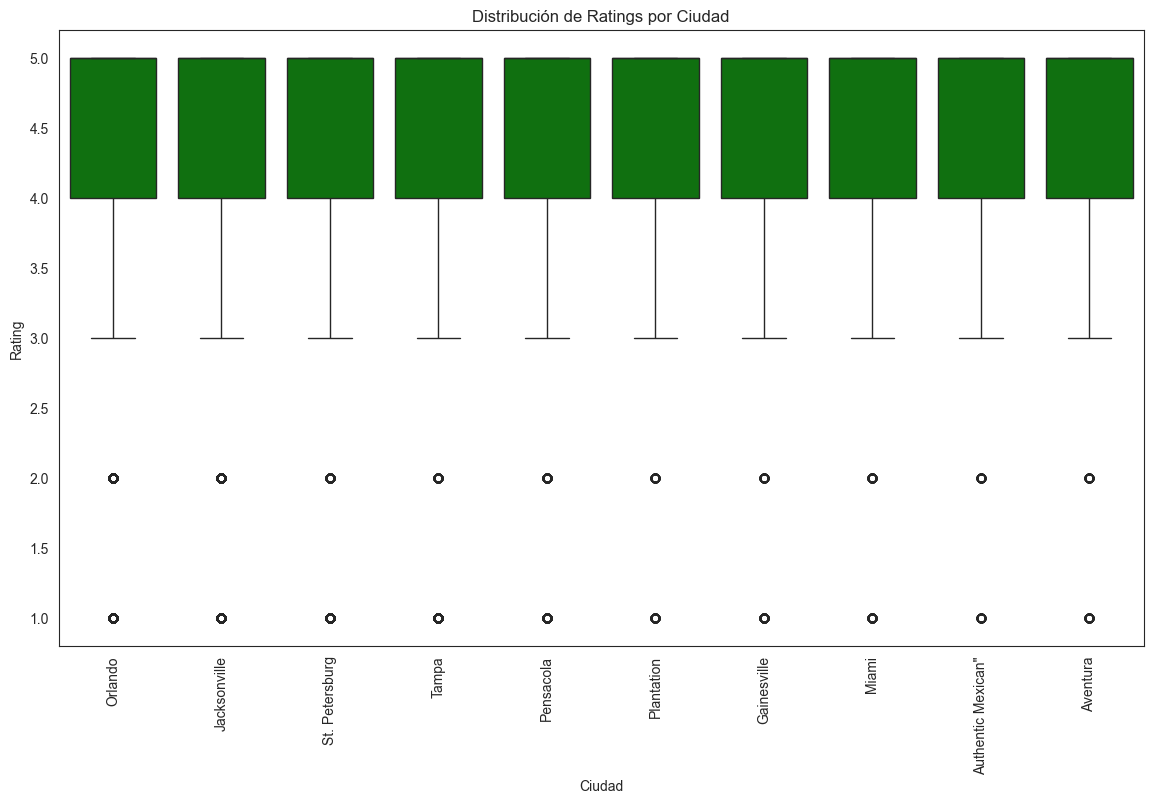

In [38]:
plt.figure(figsize=(14,8))
sns.boxplot(data=estado, x='city', y='rating', order=estado['city'].value_counts().head(10).index, color='g')
plt.title('Distribución de Ratings por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18608\263213237.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=estado, x='hour', y='rating', palette='Set2', alpha=0.6)


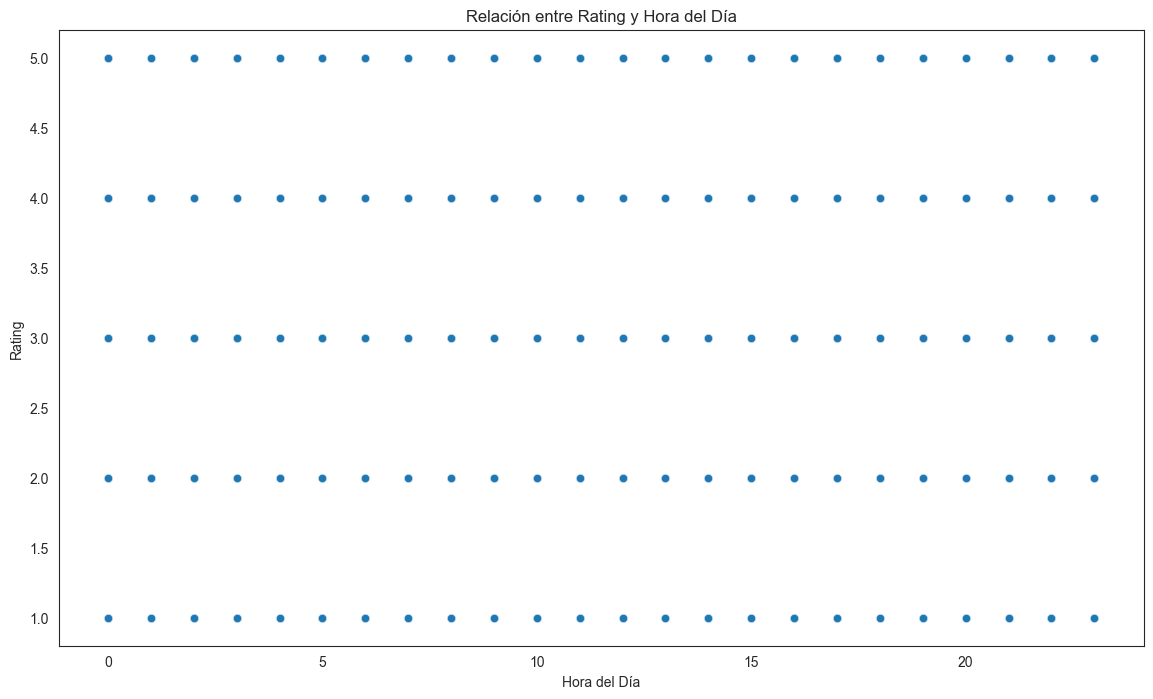

In [40]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=estado, x='hour', y='rating', palette='Set2', alpha=0.6)
plt.title('Relación entre Rating y Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Rating')
plt.show()

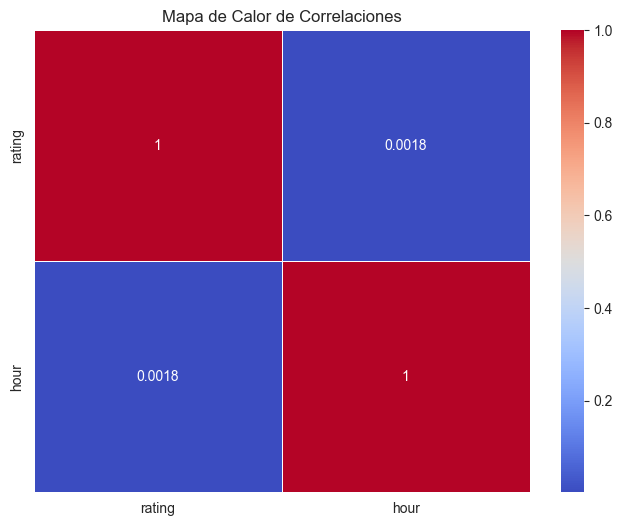

In [41]:
corr = estado[['rating', 'hour']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

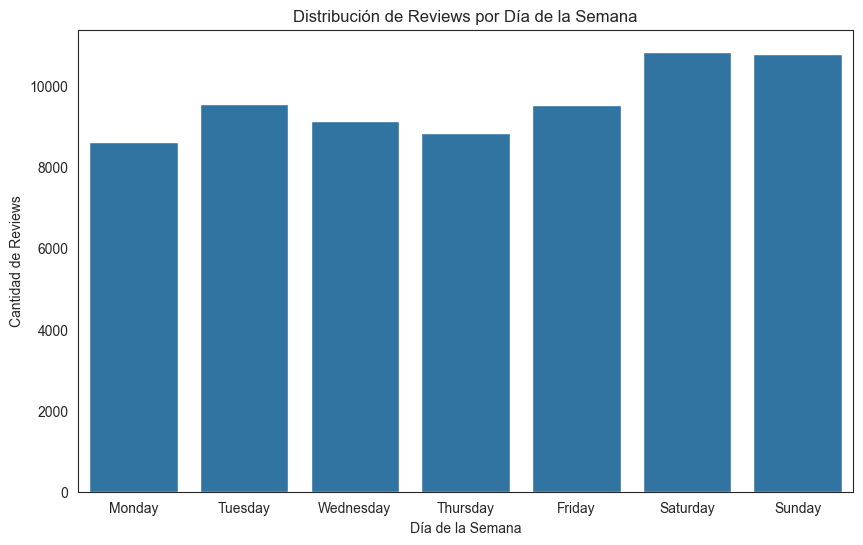

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(data=estado, x='day', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribución de Reviews por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Reviews')
plt.show()

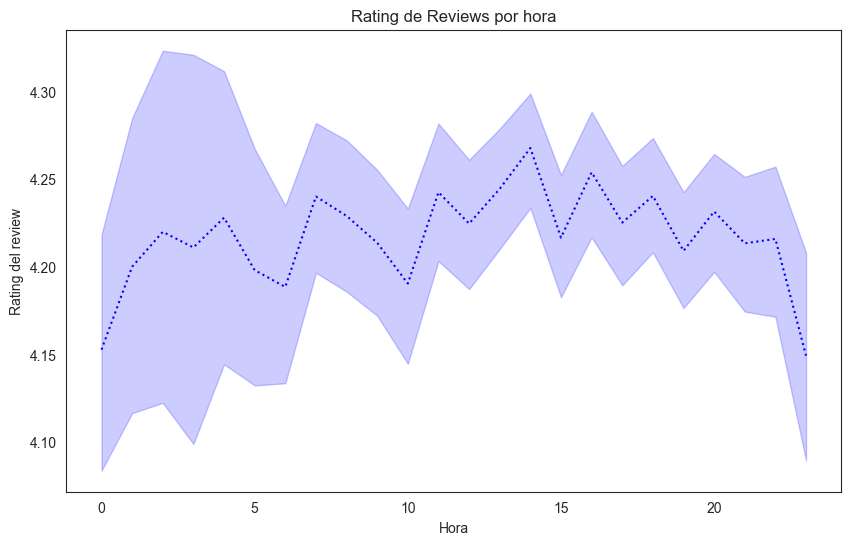

In [57]:
plt.figure(figsize=(10,6))
sns.lineplot(data=estado, x='hour', y=estado['rating'],linestyle='dotted', color='blue')
plt.title('Rating de Reviews por hora')
plt.xlabel('Hora')
plt.ylabel('Rating del review')
plt.show()

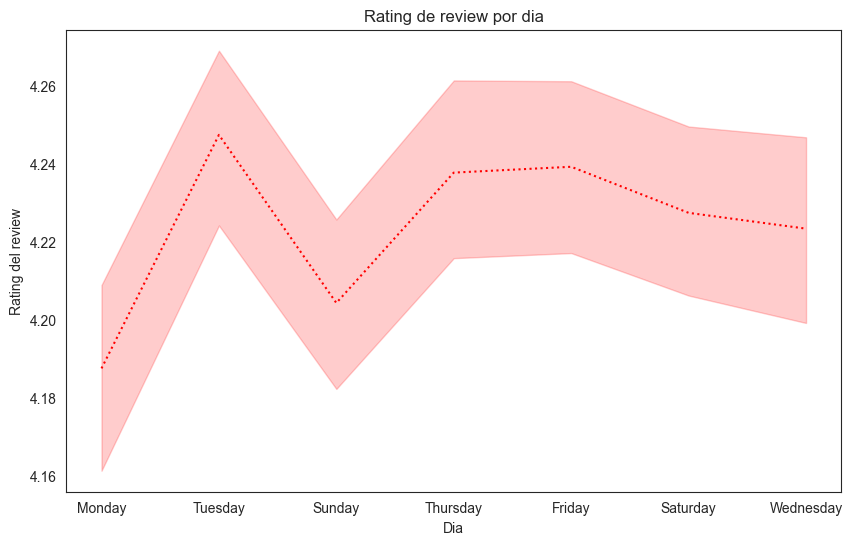

In [58]:
plt.figure(figsize=(10,6))
sns.lineplot(data=estado, x='day', y=estado['rating'],linestyle='dotted', color='red')
plt.title('Rating de review por dia')
plt.xlabel('Dia')
plt.ylabel('Rating del review')
plt.show()